# 图像模板匹配

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [21]:
src = cv2.imread('../datas/plane.jpg')
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
rgb_f = rgb.astype(np.float32)
rgb_part = cv2.imread('../datas/plane_part_2.jpg')
gray_part = cv2.imread('../datas/plane_part_2.jpg',0)

In [22]:
def matchTemplate(img,template,method):
    w, h = template.shape[1],template.shape[0]
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # I如果匹配方式是 TM_SQDIFF or TM_SQDIFF_NORMED取消最小值
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    dst = img.copy()
    cv2.rectangle(dst,top_left, bottom_right, 255, 2)
    return dst

## 1.平方差匹配法

In [23]:
res = matchTemplate(rgb,rgb_part,cv2.TM_SQDIFF)

Text(0.5,1,'TM_SQDIFF')

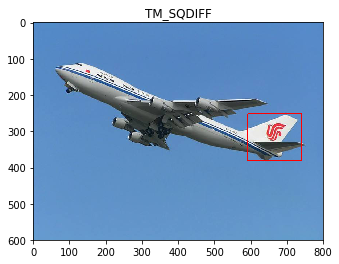

In [24]:
plt.imshow(res)
plt.title('TM_SQDIFF')

## 2.相关匹配法

In [25]:
res = matchTemplate(rgb,rgb_part,cv2.TM_CCORR)

Text(0.5,1,'TM_CCORR')

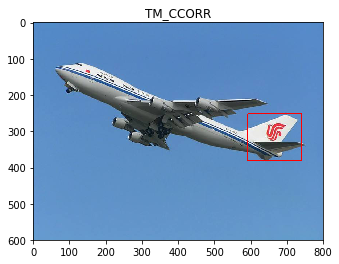

In [26]:
plt.imshow(res)
plt.title('TM_CCORR')

## 3.相关系数匹配法

In [27]:
res = matchTemplate(rgb,rgb_part,cv2.TM_CCOEFF)

Text(0.5,1,'TM_CCORR')

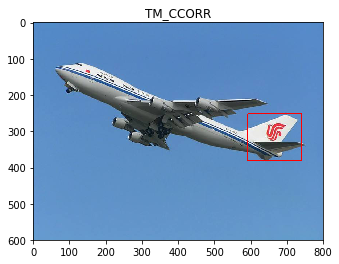

In [28]:
plt.imshow(res)
plt.title('TM_CCORR')

## 4.归一化平方差匹配法

In [29]:
res = matchTemplate(rgb,rgb_part,cv2.TM_SQDIFF_NORMED)

Text(0.5,1,'TM_SQDIFF_NORMED')

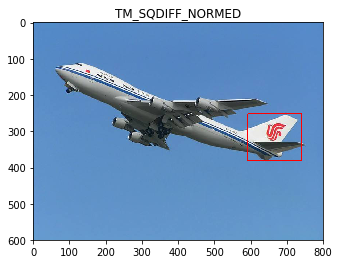

In [30]:
plt.imshow(res)
plt.title('TM_SQDIFF_NORMED')

## 5.归一化相关匹配法

In [31]:
res = matchTemplate(rgb,rgb_part,cv2.TM_CCORR_NORMED)

Text(0.5,1,'TM_CCORR_NORMED')

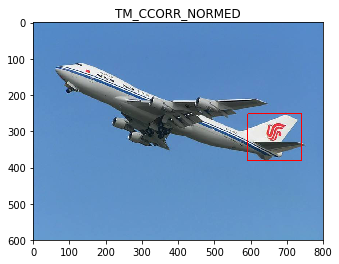

In [32]:
plt.imshow(res)
plt.title('TM_CCORR_NORMED')

## 6.归一化相关系数匹配法

In [33]:
res = matchTemplate(rgb,rgb_part,cv2.TM_CCOEFF_NORMED)

Text(0.5,1,'TM_CCOEFF_NORMED')

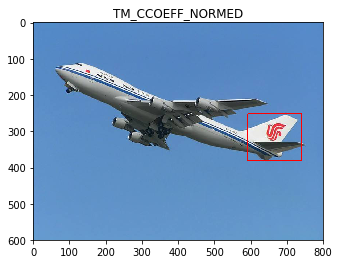

In [34]:
plt.imshow(res)
plt.title('TM_CCOEFF_NORMED')